# Importing Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

# Importing Dataset

In [24]:
forest_data=pd.read_csv('forestfires.csv')
forest_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# Data Understanding

In [25]:
forest_data.shape

(517, 31)

In [26]:
forest_data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [27]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

# Data Preparation

In [44]:
columns=forest_data.columns

In [48]:
columns=columns.drop({'size_category'})

In [29]:
le=LabelEncoder()

In [30]:
forest_data['month']=le.fit_transform(forest_data.month)
forest_data['day']=le.fit_transform(forest_data.day)
forest_data['size_category']=le.fit_transform(forest_data.size_category)

In [53]:
x=forest_data.drop(columns={'size_category'},axis=1)
y=forest_data.size_category

In [20]:
se=StandardScaler()

In [37]:
forest_scaled_data=se.fit_transform(x)

# Model Building

In [60]:
x_scaled==forest_scaled_data
y=forest_data.size_category

In [61]:
x_scaled=pd.DataFrame(data=x,columns=columns)

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 12,stratify = y)

In [63]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((413, 30), (413,), (104, 30), (104,))

# Kernel - Linear
#### Model Training without scaling | Model Testing | Model Evaluation

Overall Accuracy :  0.9808
Precision        :  1.0
Recall           :  0.9737
AUC Score        :  0.9868
Confusion Matrix :


Text(0.5, 1.0, 'Prediction Vs Actual')

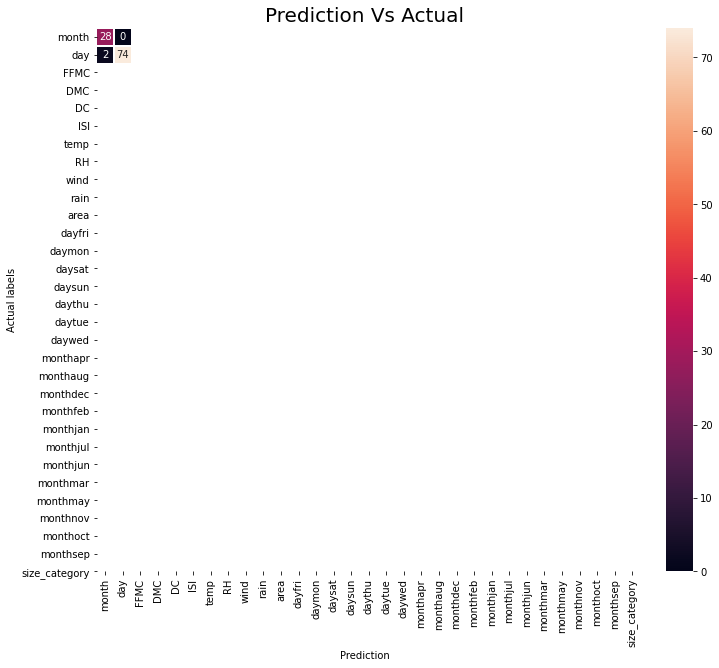

In [76]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 12,stratify = y)

svc_classifier = SVC(kernel='linear')
svc_classifier.fit(x_train,y_train)
y_pred = svc_classifier.predict(x_test)

print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred),4))
print("Precision        : ",round(precision_score(y_test,y_pred),4))
print("Recall           : ",round(recall_score(y_test,y_pred),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred),4))
print("Confusion Matrix :")

plt.figure(figsize = (12,10))
confu_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            xticklabels=forest_data.columns,
            yticklabels=forest_data.columns,
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

# Model Training with scaling | Model Testing | Model Evaluation¶
# Kernel = Linear

Overall Accuracy :  0.9808
Precision        :  1.0
Recall           :  0.9737
AUC Score        :  0.9868
Confusion Matrix :


Text(0.5, 1.0, 'Prediction Vs Actual')

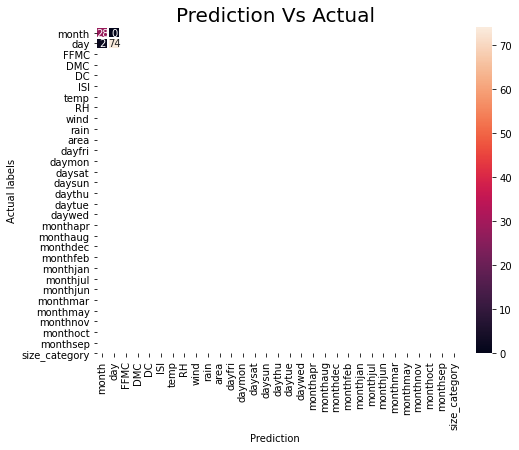

In [78]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 12,stratify = y)

svc_classifier = SVC(kernel='linear',)
svc_classifier.fit(X_train,y_train)
y_pred = svc_classifier.predict(X_test)

print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred),4))
print("Precision        : ",round(precision_score(y_test,y_pred),4))
print("Recall           : ",round(recall_score(y_test,y_pred),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred),4))
print("Confusion Matrix :")
plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            xticklabels=forest_data.columns,
            yticklabels=forest_data.columns,
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

# Kernel - Polynomial
#### Model Training with scaling | Model Testing | Model Evaluation

Overall Accuracy :  0.7308
Precision        :  0.7308
Recall           :  1.0
AUC Score        :  0.5
Confusion Matrix :


Text(0.5, 1.0, 'Prediction Vs Actual')

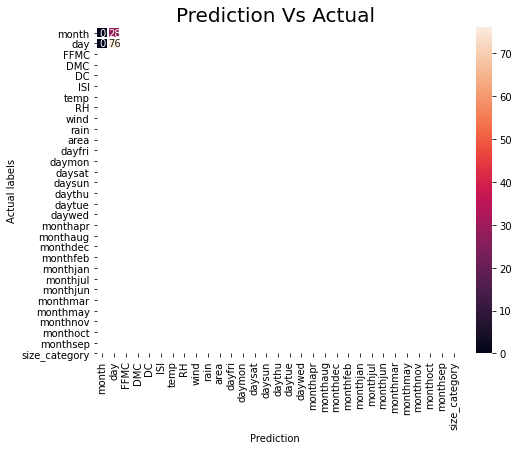

In [79]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 12,stratify = y)

svc_classifier = SVC(kernel='poly',degree = 1) #When poly degree = 1, it is a linear kernel
svc_classifier.fit(X_train,y_train)
y_pred = svc_classifier.predict(X_test)

print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred),4))
print("Precision        : ",round(precision_score(y_test,y_pred),4))
print("Recall           : ",round(recall_score(y_test,y_pred),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred),4))
print("Confusion Matrix :")

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            xticklabels=forest_data.columns,
            yticklabels=forest_data.columns,
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

# Kernel - RBF
#### Model Training with scaling | Model Testing | Model Evaluation

Overall Accuracy :  0.7596
Precision        :  0.7525
Recall           :  1.0
AUC Score        :  0.5536
Confusion Matrix :


Text(0.5, 1.0, 'Prediction Vs Actual')

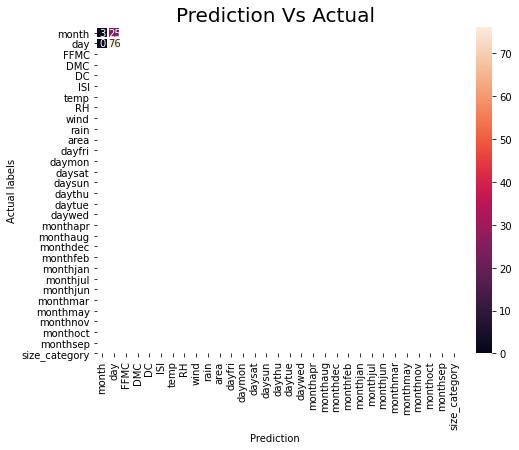

In [81]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 12,stratify = y)

svc_classifier = SVC(kernel='rbf', C=1,gamma = 0.02) #When poly degree = 1, it is a linear kernel
svc_classifier.fit(X_train,y_train)
y_pred = svc_classifier.predict(X_test)

print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred),4))
print("Precision        : ",round(precision_score(y_test,y_pred),4))
print("Recall           : ",round(recall_score(y_test,y_pred),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred),4))
print("Confusion Matrix :")

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            xticklabels=forest_data.columns,
            yticklabels=forest_data.columns,
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

In [82]:
# Here we see with Linear Kernel we gor 98% accuracy and also the misclassification is also very less